**Importing Dataframe**

In [1]:
import pandas as pd
import numpy as np

grad = pd.read_csv('admission_data.csv')
grad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
grad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**No N/A Values.**

In [4]:
grad.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**No visible outliers.**

<AxesSubplot:>

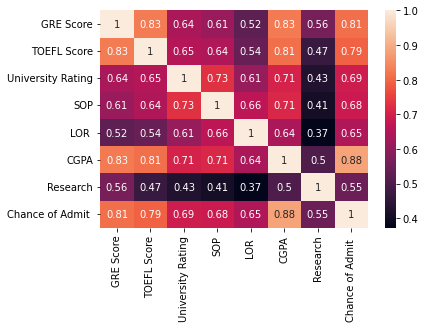

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(grad.corr(), annot = True)

**Feature Scaling**

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler  = MinMaxScaler()
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
grad[features] = scaler.fit_transform(grad[features])
grad[features].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [7]:
X = grad[features].drop(['Chance of Admit '], axis = 1)
y = grad[features]['Chance of Admit ']

In [8]:
#splitting data into train and test data for both x and y
from sklearn.model_selection import train_test_split

# 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=40)

In [9]:
print('Training sample shape: {}   Testing sample shape: {}'.format(X_train.shape,X_test.shape))

Training sample shape: (400, 7)   Testing sample shape: (100, 7)


**Linear Regression Model**

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

**Testing Accuracy of the model**

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7920887007815672